# ECON526: Quantitative Economics with Data Science Applications

Directed Graphical Models and Causality

Phil Solimine (University of British Columbia)

# Overview

## Summary

-   Previously in the course, we talked at a high level about some of
    the barriers to causal inference

-   We used the potential outcomes framework to discuss the idea of a
    treatment effect

-   Then we discussed the idea of a randomized experiment as a way to
    identify a treatment effect

    -   However, we mentioned that there are many situations where we
        cannot run a randomized experiment

-   Today, we will discuss the idea of using a **graphical model** as a
    way to analyze whether you can truly identify a treatment effect

# Directed Graphical Models

## Conditional Independence

-   Recall that two random variables $X$ and $Y$ are **conditionally
    independent** given a third random variable $Z$ if and only if the
    following holds:
    -   $P(X|Z) = P(X|Z\cap Y)$
    -   Equivalently, $P(X\cap Y| Z) = P(X|Z)P(Y|Z)$
    -   We will denote this as $X \perp Y | Z$
-   In the context of potential outcomes, we require that
    $(Y_0, Y_1) \perp T | X$
    -   This means that the potential outcomes are independent of the
        treatment assignment, given the covariates

## Directed Graphical Models

-   Complete independence is rare in complex systems. However, we can
    often find conditional independence relationships, that help inform
    our choice of statistical model.

-   We can visualize conditional independence relationships using a
    **Bayesian** or **directed graphical model**

-   A Bayesian graphical model is a directed graph where:

    -   The nodes represent random variables
    -   The edges represent conditional independence relationships

## Directed Graphical Models

-   A directed graphical model might look something like this:

In [2]:
import graphviz as gr

g = gr.Digraph()
g.node('X')
g.node('Y')
g.node('Z')
g.edge('X', 'Y')
g.edge('Z', 'Y')
g

-   Here, we have three random variables: $X$, $Y$, and $Z$
    -   $X$ and $Z$ are independent
    -   $Y$ depends on both $X$ and $Z$

## Directed Graphical Models

-   Here is a more realistic example:

In [3]:
g = gr.Digraph()
g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")
g

-   We use arrows to indicate the direction of the conditional
    independence relationship
    -   For example, $medicine \rightarrow survived$ means that
        $survived$ depends on $medicine$, but not the other way around

## Directed Graphical Models

-   Directed graphical models are useful because they allow us to
    visualize conditional independence relationships, which are often
    difficult to keep track of

-   However, they are also useful because they allow us to determine
    whether or not we can identify a treatment effect.

-   There are three very common sub-structures that appear in graphical
    models, that inform how dependence will flow through the model.

## Directed Graphical Models

Let’s look at a really simple example, which we could call a directed
path:

In [4]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", fillcolor="#5f5f5f5f", style="filled")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

-   In this stylized example, we are postulating that knowing causal
    inference is the only way to solve business problems
    -   This is obviously not true, but it is a useful example for our
        purposes

## Directed Graphical Models

-   This model highlights the following statistical process:
    -   Knowing causal inference gives you the ability to solve business
        problems
    -   Solving business problems makes you more likely to get a job
        promotion
-   Notice that this does not imply that causal knowledge is independent
    of job promotion
    -   That is, if we know the value of job promotion, we can still
        learn something about causal knowledge
    -   If we observe that a promotion happens in this model, this tells
        us that it is more likely that the person knows causal inference

## Directed Graphical Models

-   Now let’s condition on the intermediate variable $Y$

    -   This is the variable that represents the ability to solve
        business problems
    -   In the graph, we have colored this variable grey to indicate
        that we are conditioning on it

-   Conditioning on $Y$ means that we are assuming that we know whether
    or not the person solved a business problem

-   In this case, conditioning on $Y$ breaks the dependence relationship
    between $X$ and $Z$

    -   That is, $X$ and $Z$ are now independent, given $Y$
    -   Mathematically, $A \perp C$, but $X \not\perp Z | Y$

## Directed Graphical Models

Now let’s look at another common structure:

In [5]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", fillcolor="#5f5f5f5f", style="filled")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

-   In this model, we are postulating that statistics is a prerequisite
    for both causal inference and machine learning.

## Directed Graphical Models

In [6]:
g

-   This model highlights the following statistical process:
    -   Knowing statistics gives you the ability to do causal inference
    -   Knowing statistics gives you the ability to do machine learning
-   When we don’t condition for the root node, $C$, there is still a
    dependence relationship between $A$ and $B$
    -   That is, if we know that an individual has causal knowledge,
        this tells us that they are more likely to know statistics, and
        thus to also know machine learning

## Directed Graphical Models

In [7]:
g

-   By conditioning on $X$, we break the dependence relationship between
    $Y$ and $Z$
    -   That is, $A\not\perp B$, but $Y \perp Z | X$
-   We would call this a **fork** structure

## Directed Graphical Models

Finally, let’s look at a third common structure, called a **collider**:

In [8]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", fillcolor="#5f5f5f5f", style="filled")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

-   In this model, we are postulating that statistics and flattery are
    both determinants of getting a job promotion

# Dependence Flows

## The Rules of Bayes-Ball

-   We can think about the flow of dependence as a game of “Bayes-ball”
-   The rules of Bayes-ball are reasonably simple. A dependence path is
    blocked if and only if:
    1.  It contains a *non-collider* that is conditioned on
    2.  It contains a *collider* that is not conditioned on, and neither
        are any of its descendants

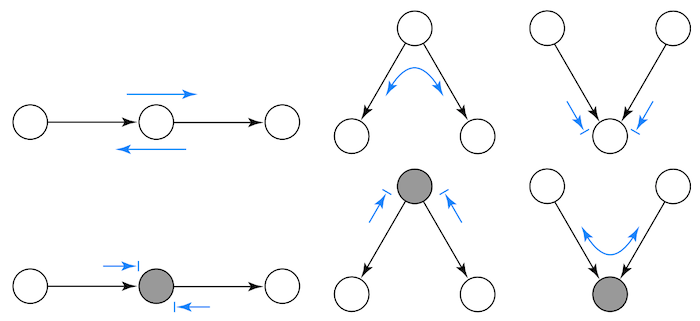

## Directed Graphical Models

Turning back to our collider example:

In [9]:
g

-   Notice that when we do not condition on $C$, $A$ and $B$ are
    independent.
-   However, somewhat unintuitively, when we condition on $X$, $Y$ and
    $Z$ become dependent.
    -   This is because conditioning on $X$ opens the flow of dependence
        from $Y$ to $Z$.
    -   In any case that is not a collider, conditioning on a node
        blocks the flow of dependence.

# Viualizing Bias

## Bias and Causality

-   In a causal inference framework, we can use graphical models to
    determine whether or not we can identify a treatment effect, and
    which covariates we need to condition on.

-   Typically, drawing out a graphical model is not necessary, but it
    can be a useful exercise to help you think through the problem.

    -   The links you draw represent the assumptions you are making
        about the data generating process

## Bias and Causality

-   There are two major types of bias that we need to worry about in
    causal inference:
    -   **Confounding**: When there is an unobserved variable that is a
        common cause of both the treatment and the outcome
    -   **Selection**: When there is an unobserved variable that is a
        common cause of both the treatment and the selection into the
        sample
-   Both of these types of bias can be represented using a graphical
    model

# Confounding

## Confounding

-   Let’s look at an example of confounding:

In [10]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("rain", "umbrella")
g.edge("rain", "wet")
g.edge("umbrella", "wet")

g.edge("severeness", "medicine")
g.edge("severeness", "survived")
g.edge("medicine", "survived")
g

-   To control for confounding, we need to condition on all of the
    common causes of the treatment and the outcome.

## Confounding

In [11]:
g = gr.Digraph()

g.node("Family Income")
g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")

g.node("SAT")
g.edge("SAT", "Educ")

g.node("Family Income")
g.edge("Family Income", "Wage")

g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

-   Often, there are confounding variables that we cannot observe
    -   For example, we cannot observe intelligence, but it is a common
        cause of both education (the treatment) and wages

## Confounding

In [12]:
g = gr.Digraph()

g.node("Family Income", fillcolor="#5f5f5f5f", style="filled")
g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")

g.node("SAT", fillcolor="#5f5f5f5f", style="filled")
g.edge("SAT", "Educ")

g.node("Family Income", fillcolor="#5f5f5f5f", style="filled")
g.edge("Family Income", "Wage")

g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

-   Often, there are confounding variables that we cannot observe
    -   For example, we cannot observe intelligence, but it is a common
        cause of both education (the treatment) and wages
    -   But we can use SAT as a **surrogate** or **proxy** for
        intelligence.

# Selection

## Selection

-   Selection bias is the other fundamental type of bias that we need to
    worry about in causal inference

-   Selection bias occurs when there is an unobserved variable that is a
    common cause of both the treatment and the selection into the sample

In [13]:
g = gr.Digraph()
g.node("X", fillcolor="#5f5f5f5f", style="filled")
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

## Selection

-   Selection bias can also occur when controlling for a **mediator**
    between the treatment and the outcome

``` python
g = gr.Digraph()

g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", fillcolor="#5f5f5f5f", style="filled")

g.edge('Enemy fire', 'Hit location')
g.edge('Hit location', 'Survival')
g.edge('Hit location', 'Observed hit locations')
g.edge('Survival', 'Observed hit locations')
g.node('Survival', fillcolor="#5f5f5f5f", style="filled")

g
```



<img src="./data/fig/airplane.svg" alt="airplane.svg" width="500"/>
Source: By Martin Grandjean (vector), McGeddon (picture), Cameron Moll
(concept) - Own work, CC BY-SA 4.0,
https://commons.wikimedia.org/w/index.php?curid=102017718

## Credits

This lecture draws heavily from [Causal Inference for the Brave and
True: Chapter 1 - Introduction to
Causality](https://matheusfacure.github.io/python-causality-handbook/03-Stats-Review-The-Most-Dangerous-Equation.html.html)
by Matheus Facure.

There is also material from [A Short Course on Graphical Models Chapter
2: Structured
Representations](http://ai.stanford.edu/~paskin/gm-short-course/) by
Mark Paskin